In [46]:
'''
Preprocessing data

- Drop NaN values
- Clean data
- All signals must use the same time resolution for aggregation
'''

'\nPreprocessing data\n\n- Drop NaN values\n- Clean data\n- All signals must use the same time resolution for aggregation\n'

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [48]:
raw_dir="data/raw/Transactions Data"

In [49]:
# Joining files in single table

frames = []

for filename in os.listdir(raw_dir):
    f = os.path.join(raw_dir, filename)
    print(f)
    # checking if it is a file
    if "detalhado" in f and ".xlsx" in f:
        df = pd.read_excel(f)
        frames.append(df)

data/raw/Transactions Data/SIBS_Analytics_Freguesias_detalhado_20220718.xlsx
data/raw/Transactions Data/SIBS_Analytics_Freguesias_detalhado_20220412.xlsx
data/raw/Transactions Data/SIBS_Analytics_Freguesias_detalhado_202110_20220222.xlsx
data/raw/Transactions Data/SIBS_Analytics_Freguesias_Agregado_2020_01_2021_11.xlsx
data/raw/Transactions Data/SIBS_Analytics_Freguesias_detalhado_20220613.xlsx
data/raw/Transactions Data/SIBS_Analytics_Freguesias_detalhado_20220511.xlsx
data/raw/Transactions Data/SIBS_Analytics_Freguesias_detalhado_20220818.xlsx
data/raw/Transactions Data/SIBS_Analytics_Freguesias_detalhado_20220310.xlsx


In [50]:
len(frames)

7

In [51]:
frames[0]

,Ano/Mês,Tipo de dia,País do cartão,Setor,Freguesia,Nº de operações,Valor das operações
0,Abr 22,Dia da Semana,Andorra,"Imprensa, Livraria e Papelaria","União das freguesias de Cedofeita, Santo Ildef...",16,343.29
1,Abr 22,Dia da Semana,Andorra,Grandes Superficies focadas em alimentação,"União das freguesias de Cedofeita, Santo Ildef...",18,262.36
2,Abr 22,Dia da Semana,Andorra,Hoteis e Resorts,ARU/ORU do Centro Histórico,15,2259.86
3,Abr 22,Dia da Semana,Andorra,Hoteis e Resorts,"União das freguesias de Cedofeita, Santo Ildef...",19,2815.76
4,Abr 22,Dia da Semana,Andorra,Restaurantes,ARU/ORU do Centro Histórico,34,824.20
...,...,...,...,...,...,...,...
17782,Jun 22,Fim de Semana,Uruguay,"Bares, Cafés e Similares","União das freguesias de Cedofeita, Santo Ildef...",15,232.15
17783,Jun 22,Fim de Semana,Bielorussia,Grandes Superficies focadas em alimentação,"União das freguesias de Cedofeita, Santo Ildef...",19,217.75
17784,Jun 22,Fim de Semana,Bielorussia,Restaurantes,ARU/ORU do Centro Histórico,26,576.25
17785,Jun 22,Fim de Semana,Bielorussia,Restaurantes,"União das freguesias de Cedofeita, Santo Ildef...",33,645.90


In [52]:
result = pd.concat(frames)

In [53]:
result

,Ano/Mês,Tipo de dia,País do cartão,Setor,Freguesia,Nº de operações,Valor das operações
0,Abr 22,Dia da Semana,Andorra,"Imprensa, Livraria e Papelaria","União das freguesias de Cedofeita, Santo Ildef...",16,343.29
1,Abr 22,Dia da Semana,Andorra,Grandes Superficies focadas em alimentação,"União das freguesias de Cedofeita, Santo Ildef...",18,262.36
2,Abr 22,Dia da Semana,Andorra,Hoteis e Resorts,ARU/ORU do Centro Histórico,15,2259.86
3,Abr 22,Dia da Semana,Andorra,Hoteis e Resorts,"União das freguesias de Cedofeita, Santo Ildef...",19,2815.76
4,Abr 22,Dia da Semana,Andorra,Restaurantes,ARU/ORU do Centro Histórico,34,824.20
...,...,...,...,...,...,...,...
10729,Fev 22,Fim de Semana,Estados Unidos Da America,Levantamentos,"União das freguesias de Aldoar, Foz do Douro e...",25,3610.00
10730,Fev 22,Fim de Semana,Estados Unidos Da America,Levantamentos,"União das freguesias de Cedofeita, Santo Ildef...",268,37130.00
10731,Fev 22,Fim de Semana,Estados Unidos Da America,Levantamentos,União das freguesias de Lordelo do Ouro e Mass...,28,4100.00
10732,Fev 22,Fim de Semana,Bielorussia,Grandes Superficies focadas em alimentação,"União das freguesias de Cedofeita, Santo Ildef...",20,266.11


In [54]:
month_dict = {
    "Jan": 1,
    "Fev": 2,
    "Mar": 3,
    "Abr":4,
    "Mai": 5,
    "Jun": 6,
    "Jul": 7,
    "Ago": 8,
    "Set": 9,
    "Out": 10,
    "Nov": 11,
    "Dez": 12,
}

result["Mês"] = [month_dict[i[:3]] for i in result["Ano/Mês"]]
result["Ano"] = [i[-2:] for i in result["Ano/Mês"]]

In [58]:
result = result.sort_values(by=["Ano", "Mês"])

In [60]:
result

,Ano/Mês,Tipo de dia,País do cartão,Setor,Freguesia,Nº de operações,Valor das operações,Mês,Ano
0,Nov 21,Dia da Semana,Andorra,Vestuário,"União das freguesias de Cedofeita, Santo Ildef...",11,445.84,11,21
1,Nov 21,Dia da Semana,Andorra,Restaurantes,ARU/ORU do Centro Histórico,32,1387.60,11,21
2,Nov 21,Dia da Semana,Andorra,Restaurantes,"União das freguesias de Cedofeita, Santo Ildef...",62,2945.95,11,21
3,Nov 21,Dia da Semana,Andorra,"Bares, Cafés e Similares","União das freguesias de Cedofeita, Santo Ildef...",31,699.96,11,21
4,Nov 21,Dia da Semana,Andorra,"Pastelarias, Padarias","União das freguesias de Cedofeita, Santo Ildef...",11,98.22,11,21
...,...,...,...,...,...,...,...,...,...
19148,Jul 22,Fim de Semana,Bielorussia,Grandes Superficies focadas em alimentação,"União das freguesias de Cedofeita, Santo Ildef...",45,457.69,7,22
19149,Jul 22,Fim de Semana,Bielorussia,Restaurantes,ARU/ORU do Centro Histórico,21,466.20,7,22
19150,Jul 22,Fim de Semana,Bielorussia,Restaurantes,"União das freguesias de Cedofeita, Santo Ildef...",57,1325.54,7,22
19151,Jul 22,Fim de Semana,Bielorussia,"Bares, Cafés e Similares","União das freguesias de Cedofeita, Santo Ildef...",23,287.30,7,22


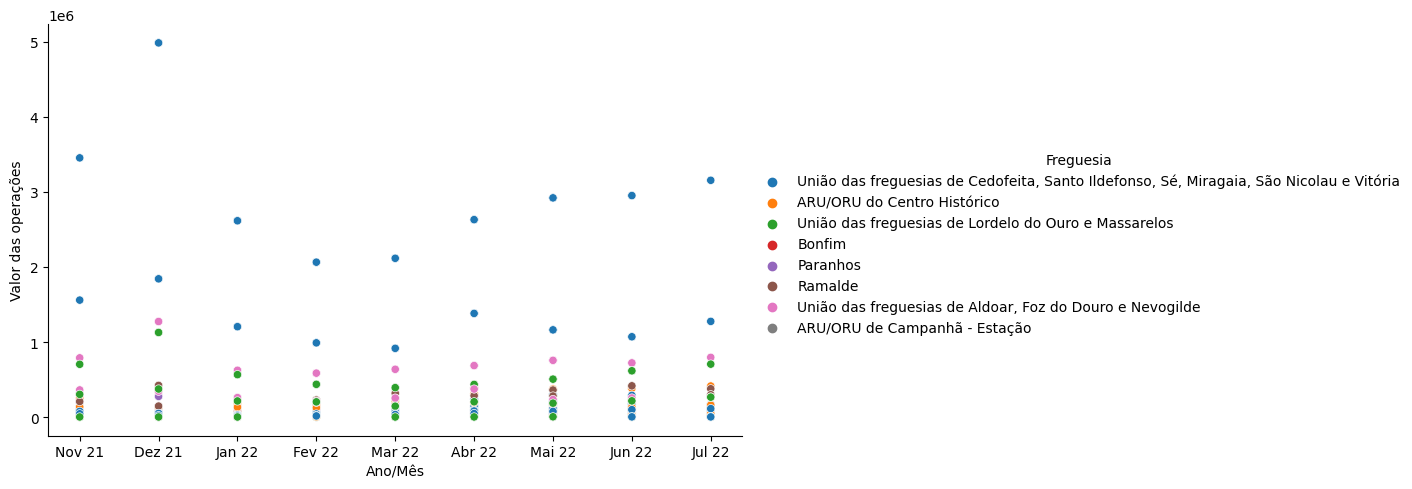

In [71]:
sns.relplot(data=result[result["Setor"]=="Vestuário"], x="Ano/Mês", y="Valor das operações", hue="Freguesia", aspect=1.61)

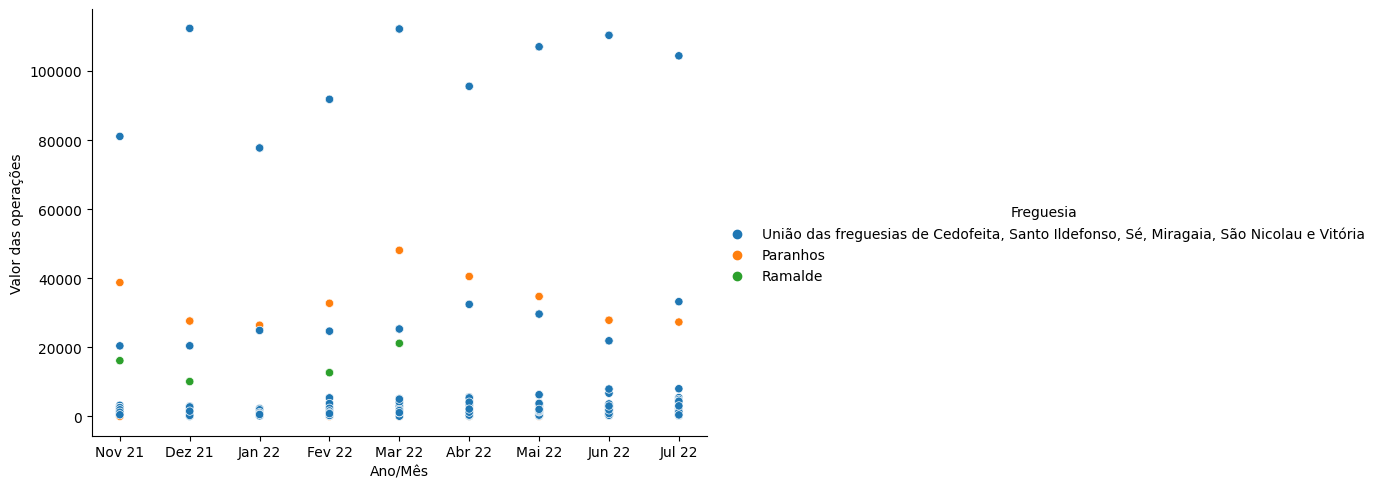

In [72]:
sns.relplot(data=result[result["Setor"]=="Restauração"], x="Ano/Mês", y="Valor das operações", hue="Freguesia", aspect=1.61)